# Solve Systems of Linear Equations
The Matrix is quadratic of form NxN.The formular is:
koefficents * x = result 

In [109]:
import numpy as np
import scipy
import timeit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def get_scipy_computation_time(matrix_size, repetitions=5):
    setup = f'''
import numpy as np
import scipy
coefficients = np.random.rand({matrix_size}, {matrix_size})
dependents = np.random.rand({matrix_size}, 1)
'''
    test_code = "scipy.linalg.solve(coefficients, dependents)"

    min_time = min(timeit.repeat(stmt=test_code, setup=setup, repeat=repetitions, number=1, globals=globals()))
    print(f"Scipy computation time for {matrix_size}x{matrix_size} matrix:\t{min_time:6f}")
    return min_time

def get_scipy_sparse_computation_time(matrix_size, repetitions=5):
    setup = f'''
import numpy as np
coefficients = np.random.rand({matrix_size}, {matrix_size})
dependents = np.random.rand({matrix_size}, 1)
'''
    test_code = "np.linalg.solve(coefficients, dependents)"

    min_time = min(timeit.repeat(stmt=test_code, setup=setup, repeat=repetitions, number=1, globals=globals()))
    print(f"Numpy computation time for {matrix_size}x{matrix_size} matrix:\t{min_time:6f} seconds ({repetitions} repetitions)")
    return min_time

def get_scipy_sparse_computation_time(matrix_size, repetitions=5):
    setup = f'''
import numpy as np
import scipy
coefficients = np.random.rand({matrix_size}, {matrix_size}) # make the array sparse
dependents = np.random.rand({matrix_size}, 1)
'''
    test_code = "scipy.linalg.solve(coefficients, dependents)"

    min_time = min(timeit.repeat(stmt=test_code, setup=setup, repeat=repetitions, number=1, globals=globals()))
    print(f"Scipy computation time for sparse {matrix_size}x{matrix_size} matrix:\t{min_time:6f} seconds ({repetitions} repetitions)")
    return min_time

def get_numpy_diagonal_computation_time(matrix_size, repetitions=5):
    setup = f'''
import numpy as np
coefficients = np.random.rand({matrix_size}, {matrix_size}) # values only on the diagonale
dependents = np.random.rand({matrix_size}, 1)
'''
    test_code = "np.linalg.solve(coefficients, dependents)"

    min_time = min(timeit.repeat(stmt=test_code, setup=setup, repeat=repetitions, number=1, globals=globals()))
    print(f"Numpy computation time for diagonal {matrix_size}x{matrix_size} matrix:\t{min_time:6f} seconds ({repetitions} repetitions)")
    return min_time

def get_scipy_diagonal_computation_time(matrix_size, repetitions=5):
    setup = f'''
import numpy as np
import scipy
coefficients = np.random.rand({matrix_size}, {matrix_size}) # values only on the diagonale
dependents = np.random.rand({matrix_size}, 1)
'''
    test_code = "np.linalg.solve(coefficients, dependents)"

    min_time = min(timeit.repeat(stmt=test_code, setup=setup, repeat=repetitions, number=1, globals=globals()))
    print(f"Scipy computation time for diagonal {matrix_size}x{matrix_size} matrix:\t{min_time:6f} seconds ({repetitions} repetitions)")
    return min_time

_ = get_scipy_computation_time(matrix_size=10)
_ = get_scipy_sparse_computation_time(matrix_size=10)

Scipy computation time for 10x10 matrix:	0.000093
Numpy computation time for 10x10 matrix:	0.000024


2.4100008886307478e-05

In [122]:
MIN_SIZE = 500
MAX_SIZE = 6500
STEP_SIZE = 1000
data = []
for size in range(MIN_SIZE, MAX_SIZE, STEP_SIZE):
    data.append((size, "Scipy", get_scipy_computation_time(matrix_size=size)))
    data.append((size, "Numpy", get_scipy_sparse_computation_time(matrix_size=size)))

# Convert list to a DataFrame with appropriate column names
results = pd.DataFrame(data, columns=["Matrix Size", "Library", "Computation Time (seconds)"])
results

Scipy computation time for 500x500 matrix:	0.007544
Numpy computation time for 500x500 matrix:	0.004326
Scipy computation time for 1500x1500 matrix:	0.088694
Numpy computation time for 1500x1500 matrix:	0.079503
Scipy computation time for 2500x2500 matrix:	0.321522
Numpy computation time for 2500x2500 matrix:	0.342164
Scipy computation time for 3500x3500 matrix:	0.777719
Numpy computation time for 3500x3500 matrix:	0.927565
Scipy computation time for 4500x4500 matrix:	1.587934
Numpy computation time for 4500x4500 matrix:	1.787482
Scipy computation time for 5500x5500 matrix:	2.578317
Numpy computation time for 5500x5500 matrix:	3.282067


,Matrix Size,Library,Computation Time (seconds)
0,500,Scipy,0.007544
1,500,Numpy,0.004326
2,1500,Scipy,0.088694
3,1500,Numpy,0.079503
4,2500,Scipy,0.321522
5,2500,Numpy,0.342164
6,3500,Scipy,0.777719
7,3500,Numpy,0.927565
8,4500,Scipy,1.587934
9,4500,Numpy,1.787482


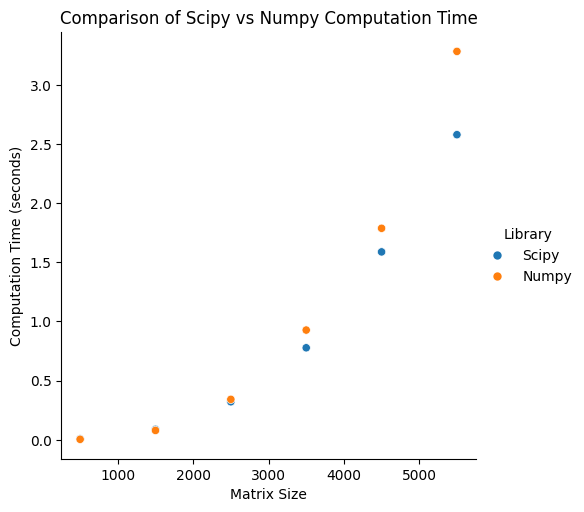

In [ ]:
g = sns.relplot(data=results, kind="scatter", x="Matrix Size", y="Computation Time (seconds)", hue="Library")

plt.title("Comparison of Scipy vs Numpy Computation Time")
plt.show()